## 01. 차원 축소(Dimension Reduction) 개요

차원 축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 데이터 세트를 생성하는 것이다.<br>
차원이 증가할수록 데이터 포인트 간의 거리는 기하급수적으로 멀이지게 되고, 희소한 구조를 가지게 된다. 또함 많은 피처를 가지는 데이터 세트는 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어지며 개별 피처간에 상관관계가 높을 가능성이 크다.<br>
선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.

일반적으로 차원 축소는 피처선택과 피처추출로 나눌 수 있다.<br>
피처 선택은 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다.<br>
피처 추출은 기존 피처를 저차원의 중요 피처로 압축하여 추출하는 것이다. 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다.

여기서 피처 추출은 기존 피처의 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것이다. 이러한 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)을 추출하는 것을 의미한다.

## 02. PCA(Principal Component Analysis)

#### PCA 개요

PCA는 대표적인 차원 축소 기법이며 여러 변수간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법이다.<br>
PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화된다. 이를 위해서는 가장 높은 분산을 가지는 데이터 축을 찾아 이 축으로 차원을 축소한다.<br>

즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다.

PCA, 즉 주성분 분석은 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.<br>
선형대수 관점에서 이를 해석해보면, 입력 데이터의 공분산 행렬을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다.<br>
이때, 고윳값(eigenvalue)은 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다.

우리가 여기서 기억해야 할 것은, 공분산 행렬 C는 고윳값과 고유벡터로 분해될 수 있다는 것이다. 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이 PCA이다.

- 입력 데이터 세트의 공분산 행렬을 생성한다.
- 공분산 행렬의 고유벡터와 고윳값을 계산한다.
- 고윳값이 가장 큰 순으로 K개만큼 고유벡터를 추출한다.
- 고윳값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()

columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns = columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


다음과 같이 load_iris()를 통해 데이터를 불러온 후, target값을 추가한 dataframe을 보였다.

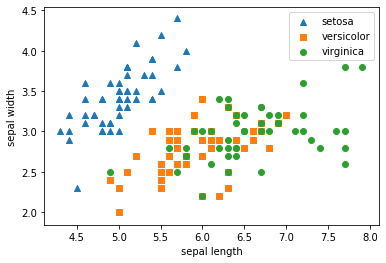

In [3]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

다음과 같이 markers를 지정함으로써 세모, 네모, 동그라미로 형태를 나누었고 for문에 enumerate를 사용함으로써 scatter함수에 x_axis에는 sepal_lenth를, y_axis에는 sepal_width를 나타내었다.

하지만, versicolor와 virginica는 뚜렷하게 분류되지 않는 모습으로 보아, 두 조건을 통해서 분류하기에는 어려움이 있다는 것을 알 수 있다. <br>
우리는 PCA를 통해 4개의 속성을 2개로 압축한 뒤 2차원으로 시각화해볼 것이다.

In [4]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

붓꽃 데이터 세트에 PCA를 적용하기 이전에 개별 속성을 함께 스케일링해야 하기 때문에 각 속성값을 동일한 스케일로 변환한다.
여기서, irisDF.iloc[:, :-1]를 데이터로 넣으면서 target값을 제거했음을 알 수 있다.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [7]:
irisDF.shape

(150, 5)

다음과 같이 irisDF의 shape가 (150, 5)인 것으로 보아, target값을 제외한 4가지 속성값이 2가지로 축소되었음을 알 수 있다.

In [8]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


PCA로 변환된 데이터 세트는 다음과 같다. 이제 2개의 속성으로 변환된 데이터 세트를 2차원상에서 시각화해보도록 하겠다.

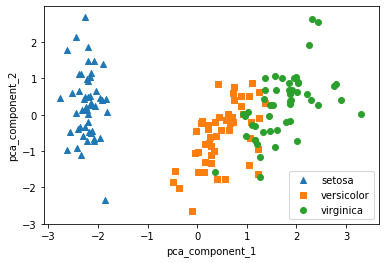

In [9]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

일부 주황색과 초록색은 겹치는 부분이 존재하지만, 비교적 잘 구분되었음을 알 수 있다. 이는 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문인데, 변동성 비율을 체크해보자.

In [10]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫 번째 PCA변환 요소인 pca_component_1이 전체 변동성의 72.9%를 차지하고 있다. 2개의 요소만으로 변동성을 95%나 설명하고 있는 것을 알 수 있다. ㅡ

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [13]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


다음은 원본 데이터와 PCA변환된 데이터 세트의 분류 적용 후 정확도 결과 비교이다.

이를 통해 우리는 PCA변환한 데이터의 경우 정확도가 10%가량 낮아졌음을 확인할 수 있지만, 속성이 절반으로 감소한 것을 감안한다면 원본 데이터의 특성을 상당 부분을 유지하고 있다는 것을 알 수 있다.

다음으로는 더 많은 피처를 가진 데이터 세트를 적은 PCA컴포넌트 기반으로 변환한 뒤, 예측 영향도에 대한 비교를 실시하도록 하겠다.

In [17]:
import pandas as pd

df = pd.read_excel('datasets/credit_card.xls', header = 1, sheet_name = 'Data').iloc[0:, 1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [18]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


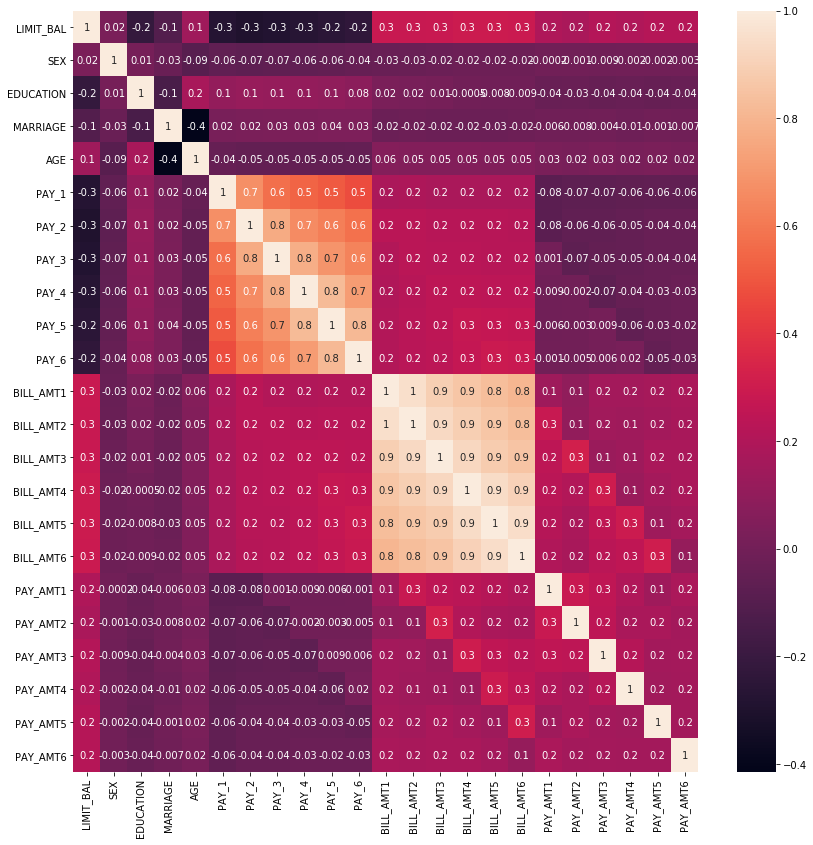

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g')

23개의 속성 데이트 세트에 대한 각 속성끼리의 상관도를 파악해보았다. <br>
BILL_AMT나 PAY를 가지고 있는 속성들이 상관도가 매우 높게 측정된다. 이들은 소수의 PCA만으로도 자연스럽게 이 변동성을 수용할 수 있기 때문에 6개의 속성을 2개의 컴포넌트로 PCA변환한 뒤 개별 컴포넌트의 변동성을 알아보도록 하였다.

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


다음 과정을 통해 2개의 PCA컴포넌트만으로 6개의 속성 변동성을 95%이상 설명할 수 있음을 확인하였다. ㅡ

In [28]:

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))

CV=3 인 경우의 개별 Fold세트별 정확도: [0.8081 0.8197 0.8232]
평균 정확도:0.8170


이번에는 cross_val을 이용하여 랜덤 포레스트를 이용해 타깃 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측하였다.

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행. 
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))


CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7915 0.7977 0.8021]
PCA 변환 데이터 셋 평균 정확도:0.7971


위에서는 기존의 24개의 컴포넌트로 예측을 수행했다면, 이번에는 24개의 컴포넌트를 6개로 축소하여 PCA한 예측 정확도를 측정하였다.<br>
축소한 컴포넌트의 수와 비교하여 정확도는 매우 작은 수치 하락하였다. 

## 03. LDA(Linear Discriminant Analysis)

### LDA 개요

LDA는 선형 판별 분석법으로 불리며, PCA와 매우 유사하다. 하지만, LDA는 지도학습의 분류(classification)에서 사용하기 쉽도록 개별 클래스를 분별할 수 있는 기준을 최대한 유지하면서 차원을 축소한다는 것이다.<br>
LDA는 입력 데이터의 결정 값 클래스를 최대한으로 분리할 수 있는 축을 찾는다.

따라서 클래스 간 분산은 최대한 크게 가져가되, 클래스 내부의 분산은 최대한 작게 가져간다. LDA스텝은 다음과 같다.

- 클래스 내부와 클래스 간 분산 행렬을 구한다. 
- 클래스 내부 분산과 클래스 간 분산 행렬을 고유벡터로 분해한다.
- 고유값이 가장 큰 순으로 K개 추출한다. 
- 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.

### 붓꽃 데이터 세트에 LDA적용하기

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

In [30]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


우리가 여기서 유의할 점은 앞의 PCA와 다르게 LDA는 지도학습이기 때문에 클래스의 결정 값이 필요하다. 따라서 fit과정에서 iris.target이 들어갔음을 확인할 수 있다.

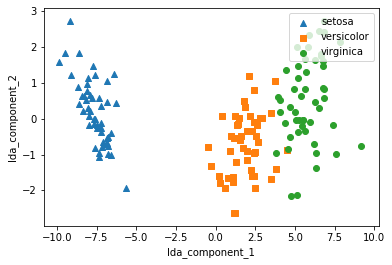

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

## 04. SVD(Singular Value Decomposition)

### SVD 개요

SVD역시 PCA와 유사한 행렬 분해 기법을 이용한다. 차이점이라면, SVD는 정방행렬 뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용할 수 있다. <br>
SVD는 특이값 분해로 불리며, 행렬 U와 V에 속한 벡터는 특이벡터이며, 모든 특이벡터는 서로 직교하는 성질을 가진다. 시그마는 대각행렬이다.<br>
시그마의 대각에 위치한 값은 특이값이며, 나머지 위치에는 모두 0으로 이루어져 있다.

In [32]:
import numpy as np
from numpy.linalg import svd

np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [33]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


여기서 Sigma의 경우에는 행렬의 대각에 위치한 값만 0이 아니고, 그렇지 않은 경우는 모두 0이므로 0이 아닌 값의 경우만 1차원 행렬로 표현하였다.

In [34]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [35]:
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

다음과 같이 이들을 내적하게 되면 원본 행렬 a와 동일하게 복원됨을 알 수 있다. 이번에는 데이터 세트가 로우 간 의존성이 있을 경우 어떻게 Sigma값이 변하고, 이에 따른 차원 축소가 진행될 수 있는지 알아보자.

In [36]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


3번째 row를 첫번재와 두번째 row의 합으로 구성하고, 4번째 row는 첫번째 row와 같게 만들면서 로우 간 의존성을 크게 만들었다.

In [37]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


다시 이 데이터를 SVD로 분해해 보았다. 이전과 차원은 같지만 Sigma값 중 2개가 0으로 변했다. 이는 선형 독립인 로우 벡터의 개수가 2개 뿐이라는 의미이다.

In [38]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


다음과 같이 행렬을 복원하였다. 이번에는 Truncated SVD를 이용하여 행렬을 분해해보았다. <br>
이는 simga행렬에 있는 대각원소, 즉 특이값 중 상위 일부 데이터만 추출해서 분해하는 방식이다. 이런 경우에는 인위적으로 더 작은 차원으로 분해하기 때문에 원본 행렬을 정확하게 다시 원복할 수는 없다는 문제점을 가지고 있다. 하지만, 상당한 수준으로 원본 행렬에 근사할 수 있다.

In [39]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

간단한 내용이다. Truncated SVD로 행렬의 특이값을 4개로 설정하여 이를 분해한 결과이다. 하지만, 이들은 완벽하게 복원되지는 않고 근사적으로 복원됨을 알 수 있다.

### 사이킷런 TruncatedSVD 클래스를 이용한 변환

Text(0, 0.5, 'TruncatedSVD Component 2')

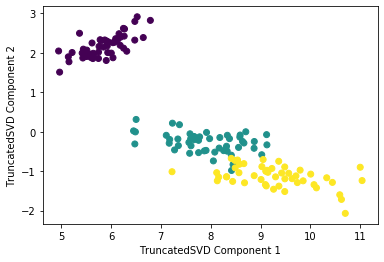

In [40]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

여기서 우리가 기억하면 좋을 부분은 TruncatedSVD 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있다는 것이다. 

Text(0.5, 1.0, 'PCA Transformed')

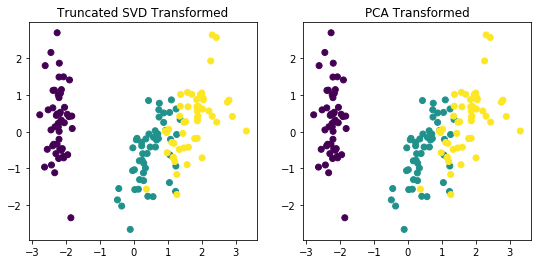

In [41]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

In [42]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.332185370749566e-15
-8.803721640582296e-17


2개의 변환이 서로 거의 동일한 수준임을 알 수 있다. 즉, 데이터 세트가 스케일링으로 데이터 중심이 동일해지면 사이킷런의 SVD와 PCA는 동일한 변환을 수행한다, 이는 PCA가 SVD 알고리즘으로 구현됐음을 의미한다. 하지만 PCA는 밀집 행렬에 대한 변환만 가능하며 SVD는 희소 행렬에 대한 변환도 가능하다. 

## 05. NMF(Non-Negative Matrix Factorization)

NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사방식의 변형이다. <br>
NMF는 원본 행렬 내의 모든 원소 값이 모두 양수라는게 보장되면 좀 더 간단하게 두 개의 기반 양수 행렬로 분해될 수 있는 기법을 지칭한다.

행렬 분해를 하게 되면 W행렬과 H행렬로 나누어지게 되는데, 분해 행렬 W는 원본 행에 대해서 잠재 요소의 값이 얼마나 되는지에 대응하며, 분해 행렬 H는 이 잠재 요소가 원본 열로 어떻게 구성됐는지를 나타내는 행렬이다.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:315: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  "'nndsvda' in 1.1 (renaming of 0.26)."), FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF Component 2')

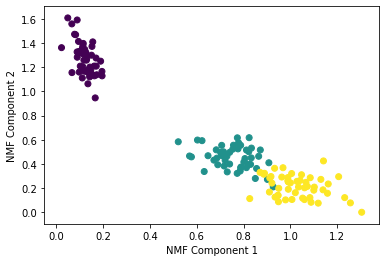

In [43]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')

## 06. 정리

대표적인 차원 축소 알고리즘인 PCA, LDA, SVD, NMF에 대해서 알아보았다. 많은 피처로 이뤄진 데이터 세트를 PCA같은 차원 축소를 통해 더욱 직관적으로 이해할 수 있었다. 무엇보다도 차원 축소는 잠재적인 요소를 추출하는데 큰 의미가 있었다. 